##### NAME: JANMEJAY MOHANTY <br> COURSE: CS 556 B <br> COURSE NAME: MATHEMATICAL FOUNDATIONS OF MACHINE LEARNING <br> CWID: 20009315 <br> EMAIL: JMOHANTY@STEVENS.EDU <br> PROGRAM: PRINCIPLE COMPONENT ANANLYSIS OF THE IRIS DATASET

In [68]:
import matplotlib.pyplot as plt      # Importing libraries
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [69]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (150, 2)
y shape: (150,)


In [70]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

In [71]:
plt.figure(2, figsize=(8, 6))
plt.clf()

<Figure size 800x600 with 0 Axes>

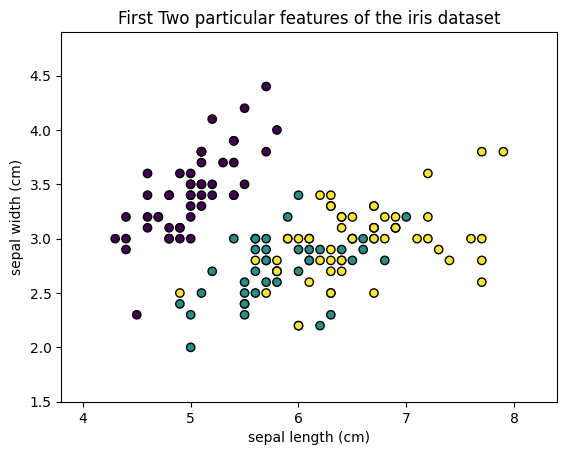

In [72]:
# Show first two features
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.viridis, edgecolors='k')
plt.xlabel(iris["feature_names"][0])
plt.ylabel(iris["feature_names"][1])
plt.title("First Two particular features of the iris dataset")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks()
plt.yticks()
plt.show()

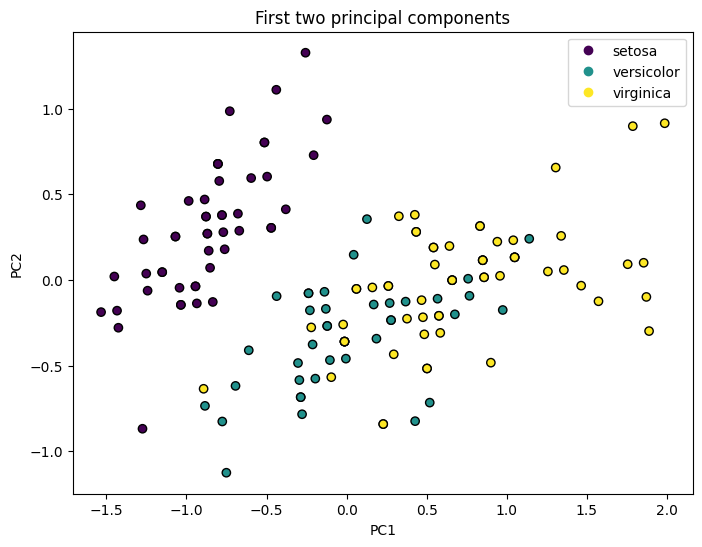

In [73]:
# Show first two principal components without scaler
pca = PCA()
plt.figure(1, figsize=(8,6))
components = pca.fit_transform(X)
plot = plt.scatter(components[:,0], components[:,1], c=y, cmap=plt.cm.viridis, edgecolors='k')
plt.legend(handles=plot.legend_elements()[0], labels=list(iris['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components")
plt.show()

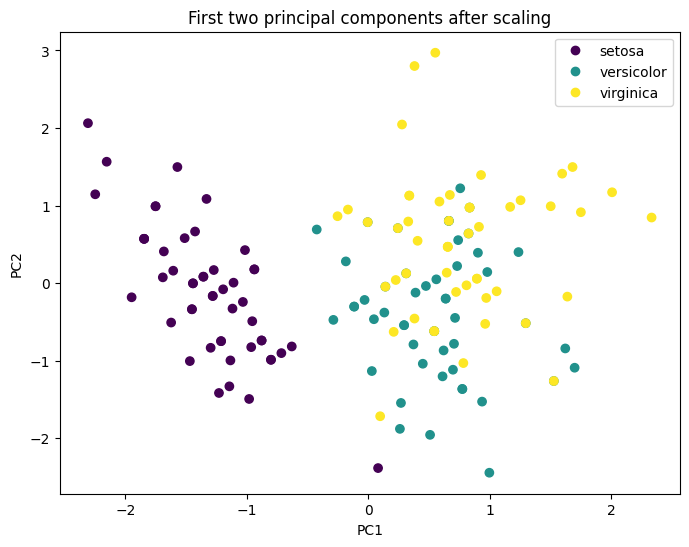

In [74]:
# Show first two principal components with scaler
pca = PCA()
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
plt.figure(figsize=(8,6))
components = pipe.fit_transform(X)
plot = plt.scatter(components[:,0], components[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0], labels=list(iris['target_names']))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.show()

In [75]:
evr = pca.explained_variance_ratio_
total_evr = evr.sum() * 100
print("Explained variation per principal component: {}".format(evr))
print("Total percentage of variance captured by the first 2 components of PCA: {}".format(total_evr))

Explained variation per principal component: [0.55878489 0.44121511]
Total percentage of variance captured by the first 2 components of PCA: 99.99999999999999


In [76]:
cov_data = pca.get_covariance()
cov_data

array([[ 1.00671141, -0.11835884],
       [-0.11835884,  1.00671141]])

In [77]:
print("The strength of each of the two principal components are: {} , {}".format(cov_data[0][0], cov_data[1][1]))

The strength of each of the two principal components are: 1.006711409395973 , 1.0067114093959741


In [78]:
mag1 = np.linalg.norm(cov_data[0])
mag2 = np.linalg.norm(cov_data[1])
print("The magnitude of each of the two principal components are: {} , {}".format(mag1, mag2))

The magnitude of each of the two principal components are: 1.0136452424516673 , 1.0136452424516684


In [79]:
sv = pca.singular_values_
print("The singular values are: {} ".format(sv))

The singular values are: [12.94741162 11.50497859] 
